# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [67]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy.stats.stats import pearsonr
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [68]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [69]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
readmit = clean_hospital_read_df.copy()
readmit.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
readmit_sort = readmit.sort_values('Number of Discharges')

In [71]:
#AO work: check on removed observations
    #more than 30% of data was lost in removal of obs w/ NA in no. of discharges 
1 - (len(readmit['Number of Discharges']) / len(hospital_read_df['Number of Discharges']))

0.3132858837485172

In [72]:
#AO work: check on discharge counts not in scatter plot
    #zeroes (81 total) and counts above 3,000 (3 total) weren't plotted 
readmit.groupby('Number of Discharges').size().head(1)

Number of Discharges
0    81
dtype: int64

In [73]:
readmit.groupby('Number of Discharges').size().tail()

Number of Discharges
2716    1
2740    1
3570    1
3980    1
6793    1
dtype: int64

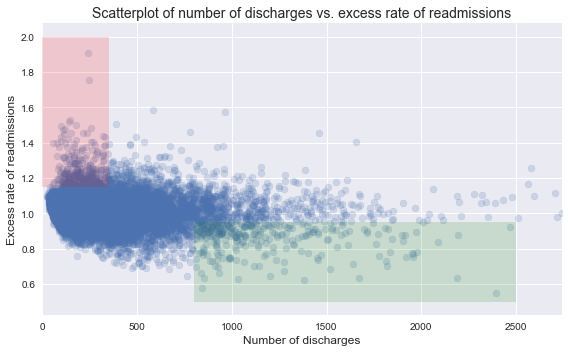

In [74]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in readmit_sort['Number of Discharges'][81:-3]]
y = list(readmit_sort['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

To start, I am somewhat uncertain about the above analysis in general because nearly a third of collected observations were removed. Excluding this large an amount of data instead of seeking an acceptable alternative can skew results. Additionally, the scatter plot above indicates that observations with excess readmission ratios equal to or less than one were used. However, the background information indicates that only ratios greater than one are considered excessive. This conflict suggests that inappropriate observations were considered. 

### Response to part A. of preliminary report:

I agree that rate of readmissions is trending down with increasing numbers of discharges. However, these trends may not be especially strong because the slope of a regression line would not be very steep. The concluded relationship between these two variables is somewhat counterintuitive, so it's important to have clear statistical evidence. Next, the colored boxes on the plot don't entirely align with the analysis. The boxes highlight the fact that observed readmission rates become more extreme as the number of discharges drops or increases, not just that their frequencies increase or decrease. 

### Response to part B.

I also found that the mean excess readmission rate is 1.023 in hospitals/facilities with a number of discharges below 100, but I found only 59% to have excess readmission rates greater than 1. And I agree that in hospitals/facilities with number of discharges above 1000, the mean excess readmission rate is 0.978 and 44% have excess readmission rates greater than 1. My calculations are below. 

In [75]:
#check statistics in part B.
less100 = readmit[readmit['Number of Discharges'] < 100]
less100['Excess Readmission Ratio'].mean()

1.0226183501683486

In [76]:
len(less100[less100['Excess Readmission Ratio'] > 1]) / len(less100['Excess Readmission Ratio']) 

0.5918045705279747

In [77]:
above1K = readmit[readmit['Number of Discharges'] > 1000]
above1K['Excess Readmission Ratio'].mean()

0.9783354211663071

In [78]:
len(above1K[above1K['Excess Readmission Ratio'] > 1]) / len(above1K['Excess Readmission Ratio']) 

0.4449244060475162

### Response to part C. 

The conclusion that there is a significant correlation between number of discharges and readmission rates is supported by a hypothesis test (for Pearson's r). The p-value is well below .01, and the coeffificient is -.0977, aligning with the weak negative slope indicated by the original scatter plot. 

The report mentions that smaller facilities may be lacking necessary resources that would ultimately help reduce readmissions. However, no evidence to support this conclusion exists yet. First, a hypothesis test only indicates that a relationship exists that is not due to chance. To get at causation of readmissions, a controlled study at relevant medical facilities is needed. Finally, we don't have any information on the capacity of facilities in this data set, so it's not fair to make conclusions based on facility size at this point. 

In [79]:
#check conclusion in part C. -- Analysis doesn't specify which readmission rate, so I'm assuming excess, which has 
# been used throughout. 

    #check for missing values
readmit['Number of Discharges'].isnull().values.any(), readmit['Excess Readmission Ratio'].isnull().values.any()

(False, True)

In [81]:
    #address missingness in excess readmission ratio -- < 1%, so remove obs w/ NA values in next cell
readmit['Excess Readmission Ratio'].isnull().sum() / len(readmit['Excess Readmission Ratio'])

0.0069960269476593536

In [82]:
noNA = readmit.dropna(subset = ['Excess Readmission Ratio'])
len(readmit), len(noNA), readmit['Excess Readmission Ratio'].isnull().sum() #math checks out

(11578, 11497, 81)

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119d09cc0>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118912940>]], dtype=object))

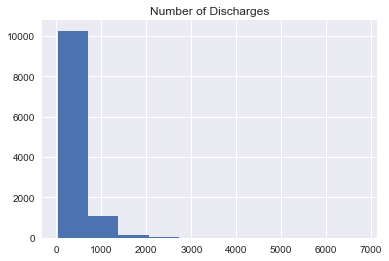

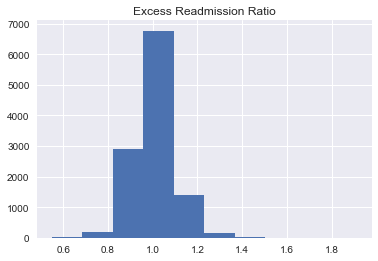

In [83]:
    #check for normality -- no. of discharges needs transformation before significance test
noNA.hist(column = 'Number of Discharges'), noNA.hist(column = 'Excess Readmission Ratio')

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11934a898>]], dtype=object)

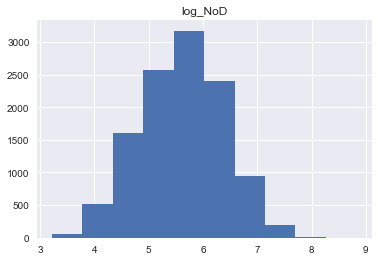

In [87]:
    #transform no. of discharges
noNA['log_NoD'] = np.log(noNA['Number of Discharges'])
noNA.hist(column = 'log_NoD')

In [89]:
pearsonr(noNA['log_NoD'], noNA['Excess Readmission Ratio'])

(-0.097669784804671492, 8.9627846050289107e-26)

### Response to part D.

For the reasons mentioned in the second part of my response to part C., it is not yet fair to argue that lower-capacity facilities should be required to demonstrate upgraded resource allocation for quality care to continue operation. Data about facility capacity needs to be considered first. 

For the same reasons, one should not yet push to incentivize consolidation of facilities to increase capacities, since there is not yet evidence to show that such changes will reduce readmissions. Based on the data available, there is no indication that such changes would reduce readmissions.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

- Steps 1-3 (hypothesis test and results) have been completed above.


- Step 4: Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
    
    Statistical significance and practical significance differ. Finding a significant correlation means only that the correlation is not due to chance. It does not imply a causal relationship, however, so there is less practical significance here. Before action steps are taken, the client should look at other variables and consider more thorough analyses before pushing for certain hospitals to upgrade resource allocation. 
    
    Additionally, the hypothesis test showed a weak correlation between the number of discharges and readmissions rate. Even though the relationship is not due to chance, it is not a strong one. As such, there may be more practically significant changes that would help reduce readmissions. 

- Step 5: Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

    One advantage of the original scatter plot is that it shows correlation fairly well. A gradual decrease in readmissions rate is noticeable as the number of discharges increases. The scatter plot also effectively shows the clustering of observations. It's helpful to see that there are far more observations where readmissions rate and discharge counts are both lower and that data become more sparse going away from these values. 
    
    One disadvantage of this scatter plot are the red and green boxes. Since they don't entirely align with the conclusions, they are mostly a distraction. Another shortcoming is the scale for excess readmissions (y-axis). The background information indicates that a ratio above 1 constitutes excess readmissions, but the plot's relevant axis starts at zero. Including rates below one is confusing and even misleading. 

In [90]:
#new, more effective plot

    #reduce df to observations with ratios > 1
ratio_1 = hospital_read_df[hospital_read_df['Excess Readmission Ratio'] > 1].sort_values(by = 'Excess Readmission Ratio', ascending = False)
ratio_1.tail(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
6654,PLACENTIA LINDA HOSPITAL,50589,CA,READM-30-PN-HRRP,141,NaN,1.0001,15.6,15.6,22.0,07/01/2010,06/30/2013
6655,METHODIST HOSPITAL OF SACRAMENTO,50590,CA,READM-30-PN-HRRP,173,NaN,1.0001,16.2,16.2,28.0,07/01/2010,06/30/2013
6656,MULTICARE AUBURN MEDICAL CENTER,500015,WA,READM-30-COPD-HRRP,227,NaN,1.0001,19.8,19.8,45.0,07/01/2010,06/30/2013
6657,DANBURY HOSPITAL,70033,CT,READM-30-HF-HRRP,1082,NaN,1.0001,22.2,22.2,240.0,07/01/2010,06/30/2013
6658,BAY AREA MEDICAL CENTER,520113,WI,READM-30-HF-HRRP,322,NaN,1.0001,22.7,22.7,73.0,07/01/2010,06/30/2013


In [91]:
    #change number of discharges to numeric, check NAs
pd.to_numeric(ratio_1['Number of Discharges'], errors = 'ignore')
ratio_1['Number of Discharges'] = ratio_1['Number of Discharges'].replace('Not Available', np.nan)
ratio_1['Number of Discharges'].isnull().sum() / len(ratio_1['Number of Discharges'])

    #10% of observations missing -- remove them
ratio_1['Number of Discharges'] = ratio_1['Number of Discharges'].dropna()

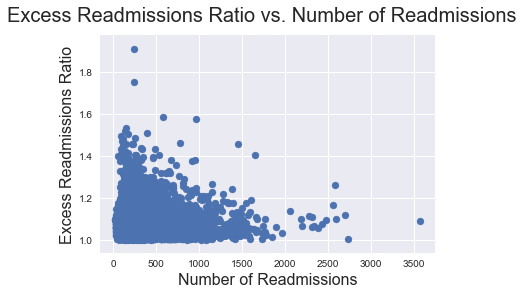

In [92]:
    #scatter plot
plt.scatter(ratio_1['Number of Discharges'], ratio_1['Excess Readmission Ratio'])
plt.suptitle('Excess Readmissions Ratio vs. Number of Readmissions', fontsize=20)
plt.xlabel('Number of Readmissions', fontsize = 16)
plt.ylabel('Excess Readmissions Ratio', fontsize = 16) 